# **Feature Engineering**

Feature engineering is the process of **using data’s domain knowledge** to create features that make machine learning algorithms work. It’s the act of **extracting important features** from raw data and transforming them into formats that are suitable for machine learning. To perform feature engineering, a data scientist combines domain knowledge (knowledge about a specific field) with math and programming skills to transform or come up with new features that will help a machine learning model perform better.

# **1. Non-automatic feature transformation**

**1.1 Adding of polynomial features**

Let us use Boston Housing dataset and look at how these features are constructed, and at how much the polynomial features help.


In [3]:
#!pip install sklearn

In [48]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

# rescale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

Now, we extract polynomial features and interactions up to a degree of 2:

In [50]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)

X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


The data originally had 13 features, which were expanded into 105 interaction features. These new features represent all possible interactions between two different original features, as well as the square of each original feature. degree=2 here means that we look at all features that are the product of up to two original features. The exact correspondence between input and output features can be found using the get_feature_names method:

In [51]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


The first new feature is a constant feature, called "1" here. The next 13 features are the original features (called "x0" to "x12"). Then follows the first feature squared ("x0^2") and combinations of the first and the other features.

Let’s compare the performance using Ridge on the data with and without interactions:

In [52]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(ridge.score(X_test_poly, y_test)))

Score without interactions: 0.621
Score with interactions: 0.753


Clearly, the interactions and polynomial features gave us a **good boost** in performance when using Ridge.

**1.2 Nonlinear transformation**

Let us consider a synthetic dataset that has properties similar to those you can find in the wild.

In [53]:
import numpy as np
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [54]:
X[:10,0]

array([ 56,  81,  25,  20,  27,  18,  12,  21, 109,   7])

Let’s look at the first 10 entries of the first feature. All are integer values and positive, but apart from that it’s hard to make out a particular pattern. If we count the **appearance of each value**, the distribution of values becomes clearer:



In [56]:
#print('Feature X[0] = ', X[:, 0])

In [57]:
print('Max Value in feature X[0] =', max(X[:,0]))
print("\nNumber of feature appearances:\n{}".format(np.bincount(X[:, 0])))

Max Value in feature X[0] = 140

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


**The value 2 seems to be the most common**, with 68 appearances (bincount always starts at 0), *and the **counts for higher values** fall quickly*. However, there are some very high values. We visualize the counts in Figure:

*Histogram of feature values for X[0]*

Text(0.5, 0, 'Value')

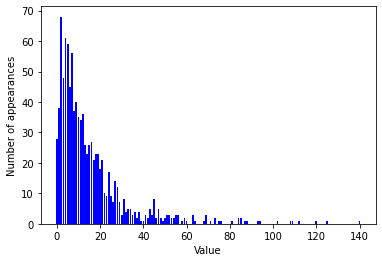

In [58]:
from matplotlib import pyplot as plt

bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='b')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

Features X[:, 1] and X[:, 2] have similar properties. **This kind of distribution of values (many small ones and a few very large ones) is very common in practice.**

However, it is something most linear models **can’t handle very well.** Let’s try to fit a ridge regression to this model:

In [59]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


As you can see from the relatively low R2 score, Ridge was not able to really capture the relationship between X and y. **Applying a logarithmic transformation can help, though.**

Because the value 0 appears in the data (and the logarithm is not defined at 0), we can’t actually just apply log, but we have to compute log(X + 1):

In [60]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

After the transformation, the distribution of the data is **less asymmetrical or (more symmetrical)** and doesn’t have very large outliers anymore:

*Histogram of feature values for X[0] after logarithmic transformation*



Text(0.5, 0, 'Value')

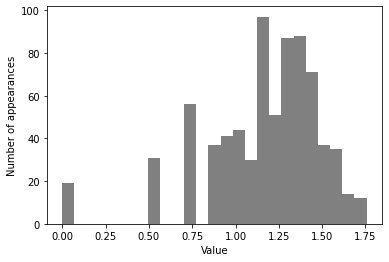

In [61]:
plt.hist(np.log(X_train_log[:, 0] + 1), bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

Building a ridge model on the new data provides a much better fit:



In [62]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


*Finding the transformation that works best for each combination of dataset and model is somewhat of an art.* In this example, all the features had the same properties. This is rarely the case in practice, and **usually only a subset of the features should be transformed,** or *sometimes each feature needs to be transformed in a different way.*



# **2. Automatic Feature Selection**

Adding more features makes all models more complex, and so increases the chance of overfitting. When adding new features, or with high-dimensional datasets in general, it can be a good idea to reduce the number of features to only the most useful ones, and discard the rest. This can lead to simpler models that generalize better. **But how can you know how good each feature is?** There are three basic strategies: univariate statistics, model-based selection, and iterative selection.

**2.1 Univariate Statistics**

In univariate statistics, we compute whether there is a **statistically significant relationship** between each feature and the target. Then *the features that are related with the highest confidence are selected.* In the case of classification, this is also known as ***analysis of variance (ANOVA)***. A key property of these tests is that they are univariate, meaning that they only **consider each feature individually.** Consequently, a feature will be discarded if it is only informative when combined with another feature. Univariate tests are often very fast to compute, and don’t require building a model. On the other hand, they are completely independent of the model that you might want to apply after the feature selection.

**To use univariate feature selection in scikit-learn**, you need to choose a test, usually either f_classif (the default) for classification or f_regression for regression, and a method to discard features based on the p-values determined in the test. All methods for discarding parameters use a threshold to discard all features with too high a p-value (which means they are unlikely to be related to the target). The methods differ in how they compute this threshold, with the simplest ones being SelectKBest, which selects a fixed number k of features, and SelectPercentile, which selects a fixed percentage of features.

Let’s apply the feature selection for classification on the cancer dataset. To make the task a bit harder, we’ll add some non-informative noise features to the data. We expect the feature selection to be able to identify the features that are non-informative and remove them:


In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# get deterministic random numbers
rng = np.random.RandomState(11)
noise = rng.normal(size=(len(cancer.data), 50))

# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(
X_w_noise, cancer.target, random_state=0, test_size=.5)

# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

# transform training set
X_train_selected = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


As you can see, the number of features was reduced from 80 to 40 (50 percent of the original number of features). We can find out which features have been selected using the get_support method, which returns a Boolean mask of the selected features (visualized in Figure):



*Features selected by SelectPercentile*





[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True  True False  True False  True  True
 False  True False False False False False  True  True False False False
  True False False False False False False False  True False False False
 False False  True False  True False  True False False False False False
 False False False False False  True  True False]


Text(0.5, 0, 'Sample index')

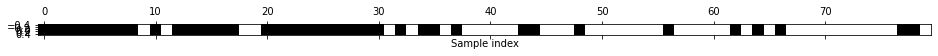

In [17]:
mask = select.get_support()
print(mask)

# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

As you can see from the visualization of the mask, most of the selected features are the original features, and most of the noise features were removed. However, the recovery of the original features is not perfect. Let’s compare the performance of logistic regression on all features against the performance using only the selected features:



In [18]:
from sklearn.linear_model import LogisticRegression

# transform test data
X_test_selected = select.transform(X_test)
lr = LogisticRegression(max_iter=10000)

lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))

lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))

Score with all features: 0.930
Score with only selected features: 0.940


Univariate feature selection can still be very helpful, though, if there is such a large number of features that building a model on them is infeasible, or if you suspect that many features are completely uninformative.

**2.2 Model-Based Feature Selection**

Model-based feature selection uses a supervised machine learning model to judge the importance of each feature, and keeps only the most important ones. The supervised model that is used for feature selection doesn’t need to be the same model that is used for the final supervised modeling. *The feature selection model needs to provide **some measure of importance** for each feature, so that they can be ranked by this measure.*

Decision trees and decision tree–based models provide a **feature_importances_ attribute**, which directly encodes the importance of each feature. **Linear models have coefficients**, which can also be used to capture feature importances by considering the absolute values. Linear models with L1 penalty learn **sparse coefficients**, which only use a small subset of features. This can be viewed as a form of feature selection for the model itself, but can also be used as a preprocessing step to select features for another model.

***In contrast to univariate selection***, model-based selection considers all features at once, and so can capture interactions (if the model can capture them). To use model-based feature selection, we need to use the **SelectFromModel** transformer:

In [19]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),threshold="median")

The **SelectFromModel** class selects all features that have an importance measure of the feature (as provided by the supervised model) greater than the provided threshold. To get a comparable result to what we got with univariate feature selection, we used the median as a threshold, so that half of the features will be selected. We use a random forest classifier with 100 trees to compute the feature importances. This is a quite complex model and much more powerful than using univariate tests. Now let’s actually fit the model:

In [20]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Again, we can have a look at the features that were selected:



*Features selected by SelectFromModel using the RandomForestClassifier*

Text(0.5, 0, 'Sample index')

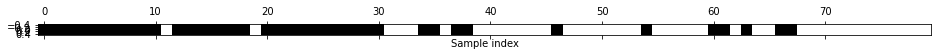

In [21]:
mask = select.get_support()

# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

This time, almost all of the original features were selected. Because we specified to select 40 features, some of the noise features are also selected. Let’s take a look at the performance:



In [22]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=10000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.958


With the better feature selection, we also gained some improvements here.



**2.3 Iterative Feature Selection**

In univariate testing we used no model, while in model-based selection we used a single model to select features. In iterative feature selection, a series of models are built, with varying numbers of features.

There are two basic methods: starting with no features and adding features one by one until some stopping criterion is reached, or starting with all features and removing features one by one until some stopping criterion is reached.

Because a series of models are built, these methods are much more computationally expensive than the methods we discussed previously. One particular method of this kind is **recursive feature elimination (RFE)**, which starts with all features, builds a model, and discards the least important feature according to the model. Then a new model is built using all but the discarded feature, and so on until only a pre-specified number of features are left. For this to work, the model used for selection needs to provide some way to determine feature importance, as was the case for the model-based selection.

Here, we use the same random forest model that we used earlier, and get the results shown in Figure:

*Features selected by recursive feature elimination with the random forest classifier model*

Text(0.5, 0, 'Sample index')

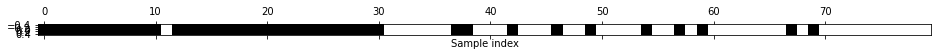

In [23]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
n_features_to_select=40)
select.fit(X_train, y_train)

# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

The feature selection got better compared to the univariate and model-based selection, but one feature was still missed. Running this code also takes significantly longer than that for the model-based selection, because a random forest model is trained 40 times, once for each feature that is dropped. Let’s test the accuracy of the logistic regression model when using RFE for feature selection:

In [24]:
X_train_rfe= select.transform(X_train)
X_test_rfe= select.transform(X_test)
score = LogisticRegression(max_iter=10000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.947


We can also use the model used inside the RFE to make predictions. This uses only the feature set that was selected:



In [25]:
print("Test score: {:.3f}".format(select.score(X_test, y_test)))

Test score: 0.947


Here, the performance of the random forest used inside the RFE is the same as that achieved by training a logistic regression model on top of the selected features. In other words, once we’ve selected the right features, the linear model performs as well as the random forest.

**If you are unsure when selecting what to use as input to your machine learning algorithms, automatic feature selection can be quite helpful.** It is also great for reducing the amount of features needed—for example, to speed up prediction or to allow for more interpretable models. In most real-world cases, applying feature selection is unlikely to provide large gains in performance. However, it is still a valuable tool in the toolbox of the feature engineer.

# **3. Categorical Features**


One of the more important steps in using machine learning in practice is taking whatever information you have about your problem and turning it into numbers that you can use to build your feature matrix.

***One common type of non-numerical data is Cagegorical data***. For example, imagine you are exploring some data on housing prices, and along with numerical features like "price" and "rooms", you also have "neighborhood" information. For example, your data might look something like this:

In [26]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

You might be tempted to encode this data with a straightforward numerical mapping:



In [27]:
{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3};

**It turns out that this is not generally a useful approach in Scikit-Learn:** the package's models make the fundamental assumption that numerical features reflect algebraic quantities. Thus such a mapping would imply, for example, that Queen Anne < Fremont < Wallingford, or even that Wallingford - Queen Anne = Fremont, which (niche demographic jokes aside) *does not make much sense.*

**In this case, one proven technique is to use one-hot encoding**, which effectively creates extra columns indicating the presence or absence of a category with a value of 1 or 0, respectively. When your data comes as a list of dictionaries, Scikit-Learn's **DictVectorizer** will do this for you:

In [28]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

**Notice that the 'neighborhood' column has been expanded into three separate columns**, representing the three neighborhood labels, and that each row has a 1 in the column associated with its neighborhood. With these categorical features thus encoded, you can proceed as normal with fitting a Scikit-Learn model.

**To see the meaning of each column,** you can inspect the feature names:

In [29]:
vec.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

**There is one clear disadvantage of this approach:** if your category has many possible values, this can greatly increase the size of your dataset. However, because the encoded data contains mostly zeros, **a sparse output can be a very efficient solution**:



In [30]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

Many (though not yet all) of the Scikit-Learn estimators accept such sparse inputs when fitting and evaluating models. **sklearn.preprocessing.OneHotEncoder** and **sklearn.feature_extraction.FeatureHasher** are two additional tools that Scikit-Learn includes to support this type of encoding.



**Task.** This data clearly cannot be well described by a straight line. Still, we can fit a line to the data using LinearRegression and get the optimal result. It's clear that we need a more sophisticated model to describe the relationship between x and y.

One approach to this is to transform the data, adding extra columns of features to drive more flexibility in the model. For example, we can add polynomial features to the data.

Do add polynomial features and compute a linear regression on this expanded input.

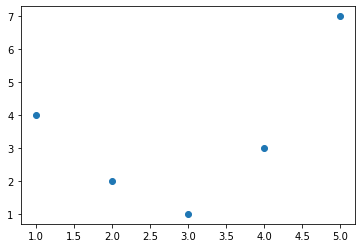

In [31]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

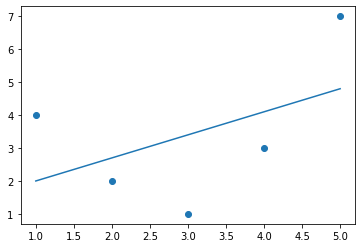

In [32]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);